In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [7]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Value'] = diabetes.target

bmi body mass index

bp average blood pressure

s1 tc, T-Cells (a type of white blood cells)

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, thyroid stimulating hormone

s5 ltg, lamotrigine

s6 glu, blood sugar level

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Value
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
cols = ['Value', 'bmi', 's3', 'bp', 's5', 's6', 's1' ]

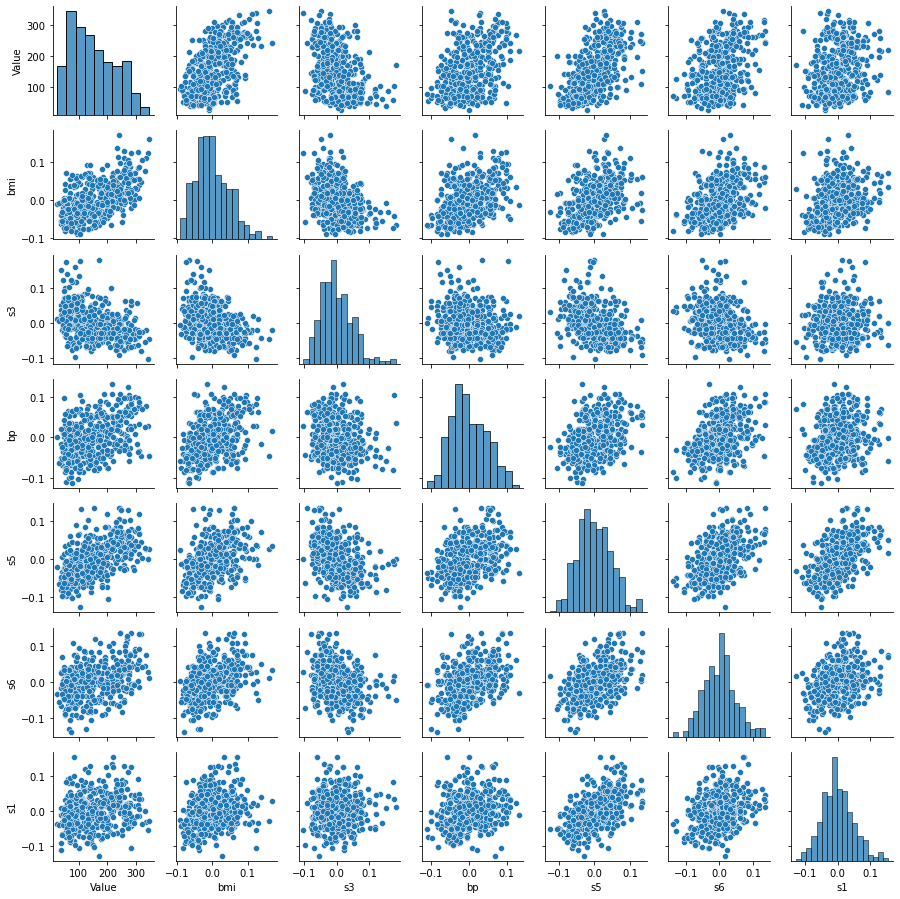

In [17]:
sns.pairplot(df[cols], height=1.8)
plt.tight_layout()

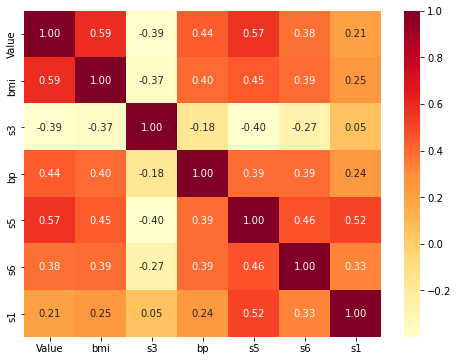

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(df[cols].corr(), annot=True, fmt='.2f', cmap="YlOrRd", yticklabels=cols, xticklabels=cols)

## Multiple Linear Regression 

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X, y)

LinearRegression()

In [21]:
pred = lr.predict(X)

Text(0.5, 1.0, 'Histogram for Predicted Values')

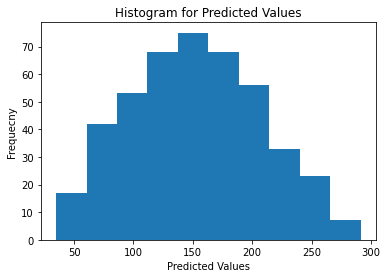

In [23]:
# Histogram: Plot a histogram of all the predicted values
plt.hist(pred)
plt.xlabel('Predicted Values')
plt.ylabel('Frequecny')
plt.title('Histogram for Predicted Values')

## Homoscedasticity and Normality:
#### The error variance should be constant, which is known as homocesdasticity and the error should be normally distributed.

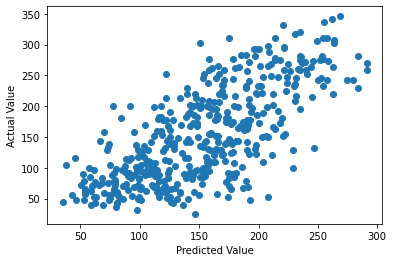

In [24]:
plt.scatter(pred, y)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

## Plotting residuals

<AxesSubplot:>

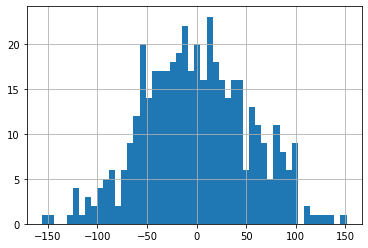

In [25]:
pd.Series(y-pred).hist(bins=50)

In [26]:
lr.intercept_

152.1334841628965

In [27]:
r2 = r2_score(y, pred)
print("R2 on test data: {:.2}".format(r2))

R2 on test data: 0.52


## Cross Validation:

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
pred_cv = cross_val_predict(lr, X, y, cv=10)

<AxesSubplot:>

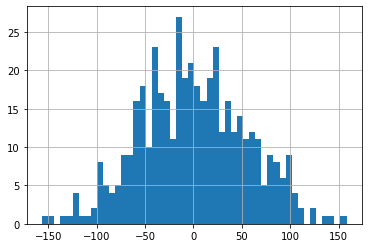

In [30]:
pd.Series(y-pred_cv).hist(bins=50)

## Q-Q plot to test if data is normally distributed

In [31]:
from scipy.stats import probplot
#We will plot our data against a normal distribution to test if our data is distributed normally.

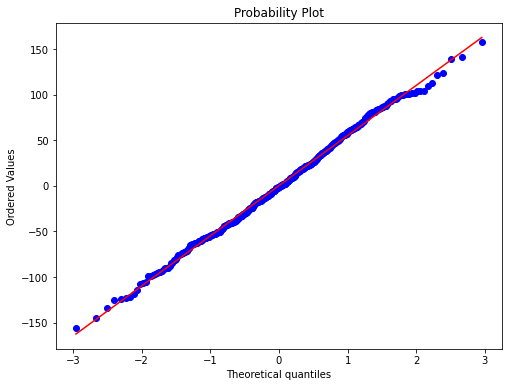

In [32]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
qq = probplot(y - pred_cv, plot=ax)

## MAE and MSE:

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
print("Mean absolute error(MAE):", mean_absolute_error(y, pred_cv))

Mean absolute error(MAE): 44.21439555691926


In [35]:
print("Mean squared error(MSE):", mean_squared_error(y, pred_cv))

Mean squared error(MSE): 2999.032285678627


In [36]:
print("Mean absolute error(MAE):", mean_absolute_error(y, pred))

Mean absolute error(MAE): 43.277395083749866


In [37]:
print("Mean squared error(MSE):", mean_squared_error(y, pred))

Mean squared error(MSE): 2859.6903987680657
